In [1]:
import random
from time import sleep

In [2]:
from dask import delayed

In [3]:

@delayed
def load(path):
    #loading from path
    sleep(random.random() * 5)

In [4]:
@delayed
def clean(data):
    #cleaning data set
    sleep(random.random() * 5)

In [5]:
@delayed
def compare(d1, d2):
    #comparing d1 and d1
    sleep(random.random() / 10)

In [6]:
@delayed
def find_best(dataset):
    #finding best in entire dataset
    sleep(random.random() / 2)

In [7]:
filenames = ['mydata-%d.dat' % i for i in range(5)]

In [8]:
dirty_dataset = [load(path) for path in filenames]

In [9]:
clean_dataset = [clean(data) for data in dirty_dataset]

In [10]:
com_array = []
for d1 in clean_dataset:
    for d2 in clean_dataset:
        c = compare(d1, d2)
        com_array.append(c)

In [11]:
best = find_best(com_array)

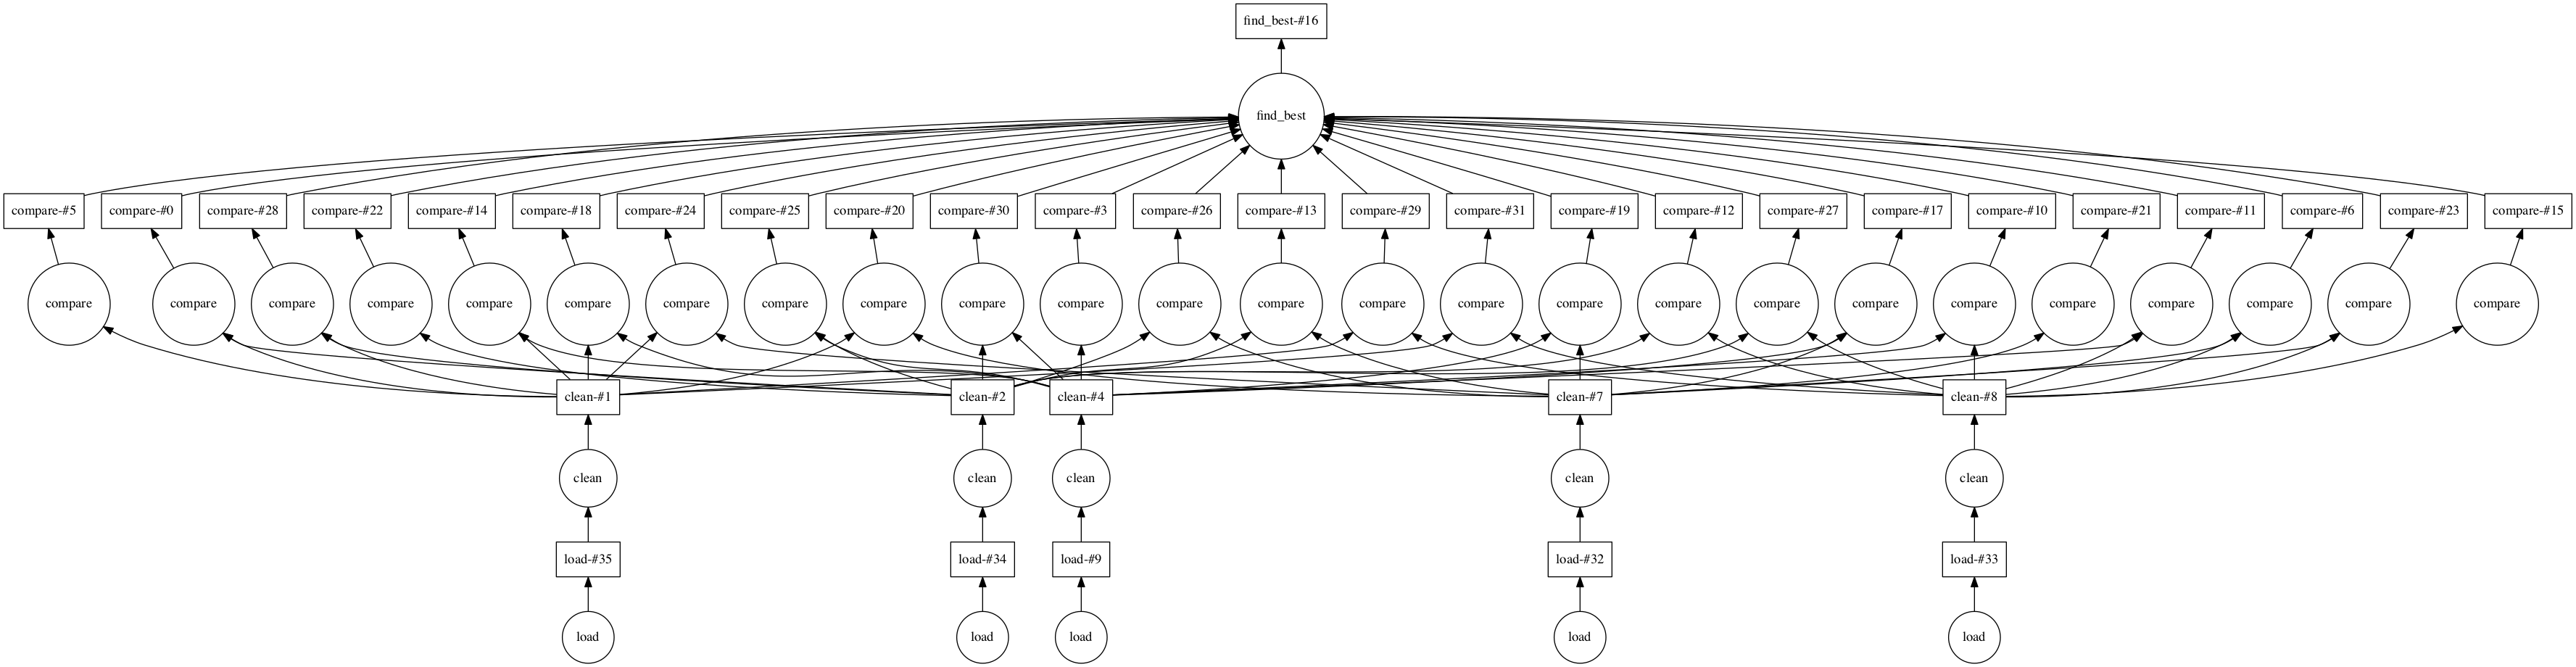

In [12]:
best.visualize()

In [28]:
from distributed import Client

In [29]:
client = Client('xxx.xxx.xxx.xxx:8786')
client

<Client: scheduler='tcp://10.195.128.140:8786' processes=16 cores=16>

In [30]:
best_result = client.persist(best)

distributed.client - WARNING - Client report stream closed to scheduler
distributed.client - WARNING - Client report stream closed to scheduler


## dask-scheduler dashboard http://xxx.xxx.xxx.xxx:8787/status